In [1]:
%pip install polars
%pip install pandas
%pip install torch torchvision torchaudio 
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install pillow
%pip install scikit-learn

In [2]:
import os
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms


In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\Aiden\Software_Engineering_Project\Clothing_AI_Model\Clothing_Data\images.csv')

# Define the classes you want to delete
classes_to_delete = ['Outwear', 'Not sure', 'Skip', 'Top', 'Other','Blouse']  # Replace with your unwanted class labels

# Filter the DataFrame to exclude the rows where 'label' is in classes_to_delete
df_filtered = df[~df['label'].isin(classes_to_delete)]

# Display the filtered class counts (optional)
print(df_filtered['label'].value_counts())

# Save the filtered DataFrame back to a CSV file
df_filtered.to_csv(r'C:\Users\Aiden\Software_Engineering_Project\Clothing_AI_Model\Clothing_Data\filtered_images.csv', index=False)

# If you want to save it as Excel:
# df_filtered.to_excel(r'C:\Users\Aiden\Software_Engineering_Project\Clothing_AI_Model\Clothing_Data\filtered_images.xlsx', index=False)


label
T-Shirt             1011
Longsleeve           699
Pants                692
Shoes                431
Buttondown_Shirt     378
Dress                357
Shorts               308
Hat                  171
Skirt                155
Polo                 120
Undershirt           118
Blazer               109
Hoodie               100
Body                  69
Name: count, dtype: int64


In [10]:
import pandas as pd

# Load the dataset (replace 'file_path.csv' with the actual file path)
df = pd.read_csv(r'C:\Users\Aiden\Software_Engineering_Project\Clothing_AI_Model\Clothing_Data\filtered_images.csv')

# Assuming the class column is named 'label', get the count of each unique label
class_counts = df['label'].value_counts()

# Display the class counts
print(class_counts)

label
T-Shirt             1011
Longsleeve           699
Pants                692
Shoes                431
Buttondown_Shirt     378
Dress                357
Shorts               308
Hat                  171
Skirt                155
Polo                 120
Undershirt           118
Blazer               109
Hoodie               100
Body                  69
Name: count, dtype: int64


In [11]:
import pandas as pd
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')  # Hide axes
    plt.show()

In [12]:
# Define paths and data transformations
data_path = r'C:\Users\Aiden\Software_Engineering_Project\Clothing_AI_Model\Clothing_Data\filtered_images.csv'

# Define image transformations: resizing to 224x224 (EfficientNetB0 input size), normalization based on ImageNet values
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to the input size of EfficientNet
    transforms.RandomHorizontalFlip(),  # Apply data augmentation
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize using ImageNet mean and std dev
])


In [16]:
class ClothingDataset(Dataset):
    def __init__(self, csv_file, img_transform=None):
        self.data = pd.read_csv(csv_file)
        self.img_transform = img_transform
        self.base_path = r'C:/Users/Aiden/Software_Engineering_Project/Clothing_AI_Model/Clothing_Data/images_compressed/'  # Add the correct base path

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_filename = self.data.iloc[idx, 0].strip()  # Column 0 for image filename
        if not img_filename.lower().endswith('.jpg'):
            img_filename += '.jpg'
        img_path = os.path.join(self.base_path, img_filename)
        
        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image at index {idx}: {e}")
            image = None

        # Get the label from the correct column (index 2)
        label = self.data.iloc[idx, 2]  # Column 2 for label
        if self.img_transform and image is not None:
            image = self.img_transform(image)
        return image, label
    
        



Attempting to load image from: C:/Users/Aiden/Software_Engineering_Project/Clothing_AI_Model/Clothing_Data/images_compressed/13aa07bd-cf38-4309-8dc2-daddffe43922.jpg
Loaded image at index 0: 312


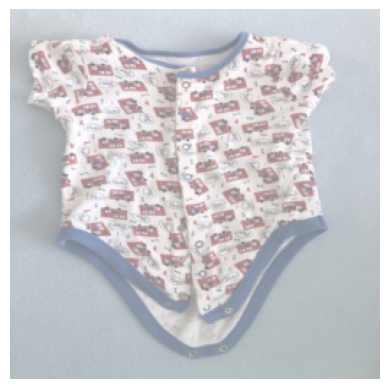

Attempting to load image from: C:/Users/Aiden/Software_Engineering_Project/Clothing_AI_Model/Clothing_Data/images_compressed/be698ba0-7a2c-4f38-84ea-6223dc15854d.jpg
Loaded image at index 1: 82


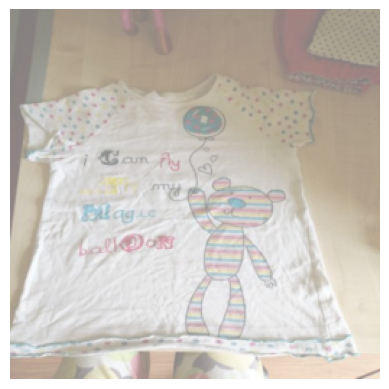

Attempting to load image from: C:/Users/Aiden/Software_Engineering_Project/Clothing_AI_Model/Clothing_Data/images_compressed/073f2d48-e363-474d-acbe-11103356e7e2.jpg
Loaded image at index 2: 180


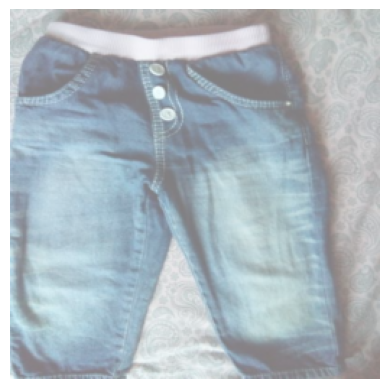

Attempting to load image from: C:/Users/Aiden/Software_Engineering_Project/Clothing_AI_Model/Clothing_Data/images_compressed/54e4e91f-b255-4e2d-906f-c482432a7048.jpg
Loaded image at index 3: 288


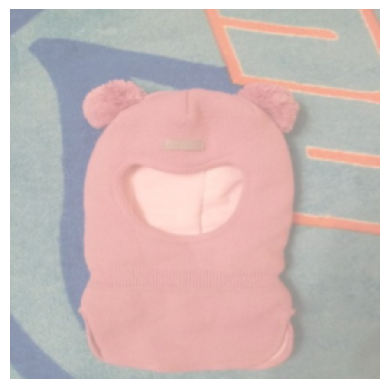

Attempting to load image from: C:/Users/Aiden/Software_Engineering_Project/Clothing_AI_Model/Clothing_Data/images_compressed/e94c0116-4bf1-4fc7-acc5-0710e208583e.jpg
Loaded image at index 4: 109


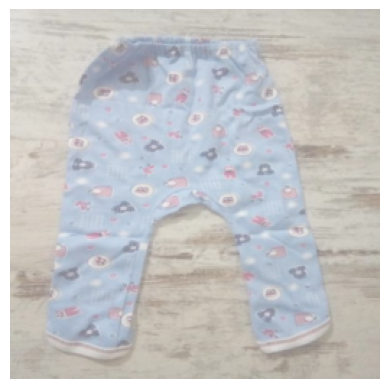

In [14]:
# Example transformation (optional)
image_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Create an instance of the dataset
dataset = ClothingDataset(csv_file=r'C:/Users\Aiden\Software_Engineering_Project/Clothing_AI_Model/Clothing_Data/filtered_images.csv', img_transform=image_transforms)

# Load a few images to test
for idx in range(5):
    try:
        image, label = dataset[idx]  # Get the image and label
        if image is not None:  # Check if the image was loaded successfully
            print(f"Loaded image at index {idx}: {label}")
            imshow(image)  # Display the image
    except Exception as e:
        print(f"Error loading image at index {idx}: {e}")

# "C:\Users\Aiden\Software_Engineering_Project\Clothing_AI_Model\Clothing_Data\images_compressed\13aa07bd-cf38-4309-8dc2-daddffe43922.jpg"
# "C:/Users/Aiden/Software_Engineering_Project/Clothing_AI_Model/Clothing_Data/images_compressed/13aa07bd-cf38-4309-8dc2-daddffe43922"

Loading Batches:   0%|          | 0/148 [00:00<?, ?it/s]

Attempting to load image from: C:/Users/Aiden/Software_Engineering_Project/Clothing_AI_Model/Clothing_Data/images_compressed/cb24db34-d06c-4671-89a7-7f5e5eee7cdc.jpg
Attempting to load image from: C:/Users/Aiden/Software_Engineering_Project/Clothing_AI_Model/Clothing_Data/images_compressed/957e1ac2-d74a-47af-ba30-766fca06abe2.jpg
Attempting to load image from: C:/Users/Aiden/Software_Engineering_Project/Clothing_AI_Model/Clothing_Data/images_compressed/04f0b07f-4b9f-4c55-bc5d-b693658fb32c.jpg
Attempting to load image from: C:/Users/Aiden/Software_Engineering_Project/Clothing_AI_Model/Clothing_Data/images_compressed/2b3a5050-1533-4f69-a732-88e102b8e89d.jpg
Attempting to load image from: C:/Users/Aiden/Software_Engineering_Project/Clothing_AI_Model/Clothing_Data/images_compressed/3ad2f431-cc51-45af-9e4c-8b13f3b6772c.jpg
Attempting to load image from: C:/Users/Aiden/Software_Engineering_Project/Clothing_AI_Model/Clothing_Data/images_compressed/ed149619-b61a-4f21-9a5f-ba3799ebbc28.jpg
Atte

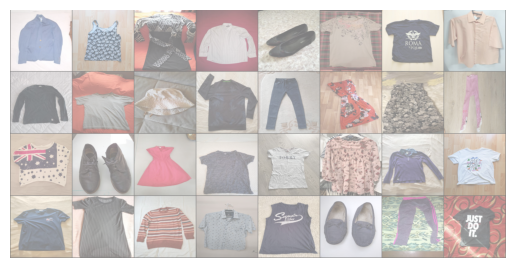

Loading Batches:   0%|          | 0/148 [00:01<?, ?it/s]

Labels: tensor([204,  50, 322, 260, 131, 168, 204, 181, 310,  54, 166, 135, 142, 241,
        353, 201,  46, 204, 131, 197,  14, 267, 282,  50, 282,   6, 204, 310,
        127, 204, 240, 111])


In [15]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from tqdm import tqdm  # Import tqdm for the progress bar
import torch

# Helper function to un-normalize and display images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')  # Hide axes
    plt.show()

dataset = ClothingDataset(csv_file='C:/Users\Aiden\Software_Engineering_Project/Clothing_AI_Model/Clothing_Data/filtered_images.csv', img_transform=image_transforms)
# Create the DataLoader with num_workers set to 0
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=0)

# Get the number of batches
num_batches = len(dataloader)

# Iterate over the DataLoader with a progress bar
for images, labels in tqdm(dataloader, total=num_batches, desc="Loading Batches"):
    # Show images from the first batch
    imshow(torchvision.utils.make_grid(images))
    print(f'Labels: {labels}')
    break  # Remove or comment this line if you want to see more batches


In [ ]:
from sklearn.model_selection import train_test_split

# Load CSV data
data = pd.read_csv(data_path)

# Perform a train-test split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Save train and test CSV files (optional if needed)
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


In [ ]:
# Create separate datasets for training and testing
train_dataset = ClothingDataset(csv_file='train_data.csv', img_transform=image_transforms)
test_dataset = ClothingDataset(csv_file='test_data.csv', img_transform=image_transforms)

# DataLoaders for training and testing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import efficientnet_b0

# Check if GPU is available and use it
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

# Load pre-trained EfficientNet-B0 model without the final classification layer (include_top=False equivalent)
model = efficientnet_b0(pretrained=True)

# Modify the final layer to match the number of clothing categories (13 classes)
num_classes = 13
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

# Move the model to the appropriate device
model = model.to(device)


In [ ]:
# Loss function: Cross-entropy loss is commonly used for classification tasks
criterion = nn.CrossEntropyLoss()

# Optimizer: Adam works well for deep learning models
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Learning rate scheduler (optional) to decrease learning rate after a plateau
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)


In [ ]:
# Training function
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    model.train()  # Set model to training mode
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        # Loop over the training data
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Calculate running loss and accuracy
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

        # Validation after each epoch (optional, can be commented out if only training)
        validate_model(model, criterion, val_loader)

        # Step the learning rate scheduler (if using)
        scheduler.step()

# Validation function
def validate_model(model, criterion, val_loader):
    model.eval()  # Set model to evaluation mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():  # No need to track gradients for validation
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            
            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_loss = running_loss / len(val_loader)
    val_acc = 100 * correct / total
    print(f'Validation Loss: {val_loss:.4f}, Accuracy: {val_acc:.2f}%')
    
    return val_loss, val_acc


In [ ]:
# Train the model with training and validation data loaders
num_epochs = 10  # You can increase/decrease based on your need

train_model(model, criterion, optimizer, train_loader, test_loader, num_epochs=num_epochs)


In [ ]:
# Save the trained model to disk
torch.save(model.state_dict(), 'clothing_classifier_efficientnet.pt')
print('Model saved successfully!')


# Testing

In [ ]:
# Load the model for inference
model = efficientnet_b0(pretrained=False)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
model.load_state_dict(torch.load('clothing_classifier_efficientnet.pth'))
model = model.to(device)
print('Model loaded successfully!')


In [ ]:
from torchvision import transforms
from PIL import Image

# Example: load a single image and preprocess it
img_path = 'path/to/single/test/image.jpg'
image = Image.open(img_path).convert('RGB')

# Apply the same transformations used during training
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Preprocess the image and add a batch dimension
image = transform(image).unsqueeze(0).to(device)

# Model inference
model.eval()
with torch.no_grad():
    outputs = model(image)
    _, predicted = torch.max(outputs.data, 1)
    print(f'Predicted class: {predicted.item()}')
